In [64]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores('Hello, I love you more than any thing')

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

In [65]:
#import nltk
#nltk.downloader.download('vader_lexicon')

In [66]:
with open('miracle_in_the_andes.txt', 'r', encoding='utf-8') as file:
    book = file.read()

In [67]:
import re
pattern = re.compile('Chapter [0-9]+')
chapters = re.split(pattern, book)
chapters = chapters[1:]

In [68]:
for nr, chapter in enumerate(chapters):
    scores = analyzer.polarity_scores(chapter)
    if scores['neg'] > scores['pos']:
        print(f"Chapter {nr + 1} is Negative")
    else:
        print(f"Chapter {nr + 1} is Positive")

Chapter 1 is Positive
Chapter 2 is Positive
Chapter 3 is Negative
Chapter 4 is Negative
Chapter 5 is Positive
Chapter 6 is Negative
Chapter 7 is Negative
Chapter 8 is Negative
Chapter 9 is Negative
Chapter 10 is Positive


In [69]:
# love_pattern = re.compile('[ a-zA-Z ]* love [ a-zA-Z ]*') #[ a-zA-Z ]* love [ a-zA-Z ]
# love_sentences = re.findall(love_pattern, book)

# for love_sentence in love_sentences:
#     scores = analyzer.polarity_scores(love_sentence)
#     if scores['neg'] > scores['pos']:
#         print(love_sentence, ":" "Negative")
#     else:
#         print(love_sentence ,":", "Positive")

# Perform analysis to check the frequency of positive negative and neutral sentences in each chapter of the book

In [70]:
# Split chapters with a patter that looks like Chapter 1, Chapter 2, .........
pattern = re.compile('Chapter [0-9]+')
chapters = re.split(pattern, book)
chapters = chapters[1:]


In [105]:
# Function to clean all the newlines and replace the newlines after a word with period (.)

def clean_text(text):
    # Strip leading spaces/newlines and replace trailing ones with a period
    cleaned_text = text.lstrip()  # Remove leading spaces/newlines
    cleaned_text = re.sub(r'\s+$', '.', cleaned_text) # Replace trailing spaces/newlines with a period
    return cleaned_text

In [106]:
# save each chapters in a dictionary with the chapter as the key {'chapter 1': '........'} and also claen the sentences before passing it to the dictionary

book = {}
# cleaned_chapters = []
# for chapter in chapters:
#     cleaned_chapters.append(clean_text(chapter))

for nr, chapter in enumerate(chapters):
    chapter_sentences = chapter.split('.')
    book[f"chapter {nr + 1}"] = chapter_sentences

In [113]:
#I noticed there are some there are some empty sentences. I'll remove them
for chapter in book.keys():
    for sentence in book[chapter]:
        if len(sentence) < 1:
            book[chapter].remove(sentence)

In [150]:
def get_sentiment_analysis(text):
    scores = analyzer.polarity_scores(text)
    if scores['neg'] > scores['pos']:
        return 'Negative'
    elif scores['pos'] > scores['neg']:
        return 'Positive'
    else:
        return 'Neutral'

In [151]:
analyzer.polarity_scores(book['chapter 1'][0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [152]:
analysis_score = {}

for chapter in book.keys():
    if not chapter in analysis_score.keys():
        analysis_score[chapter] = []
    for sentence in book[chapter]:
        sentiment = get_sentiment_analysis(sentence)
        analysis_score[chapter].append(sentiment)
        

In [154]:
from matplotlib import pyplot as plt

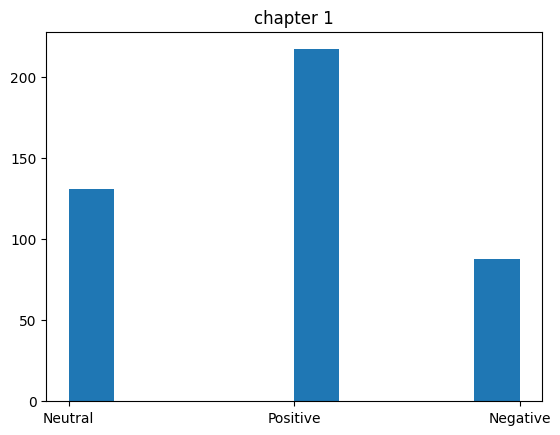

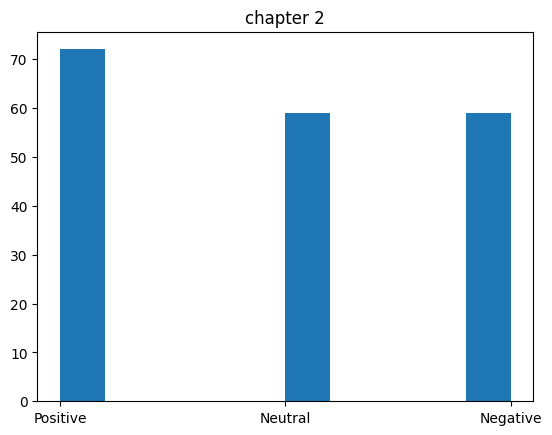

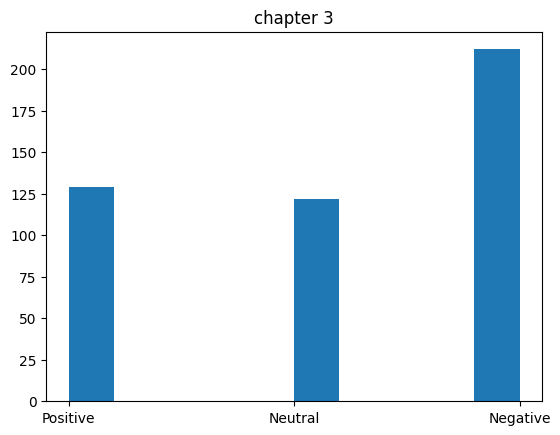

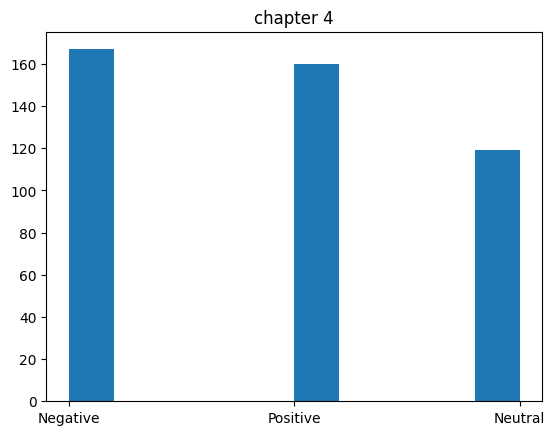

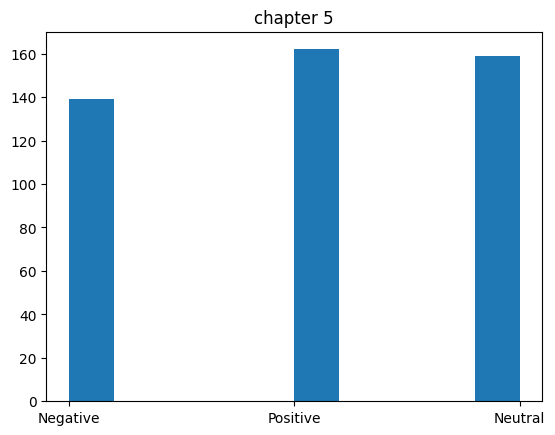

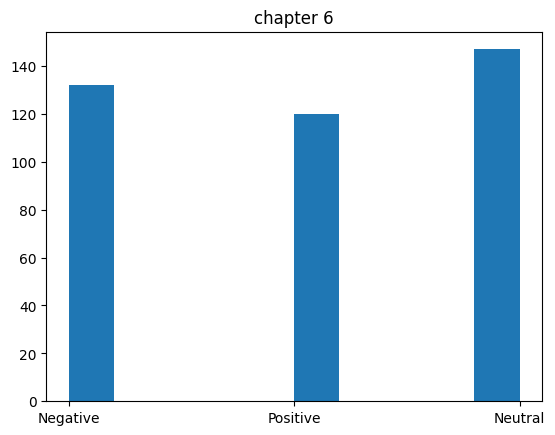

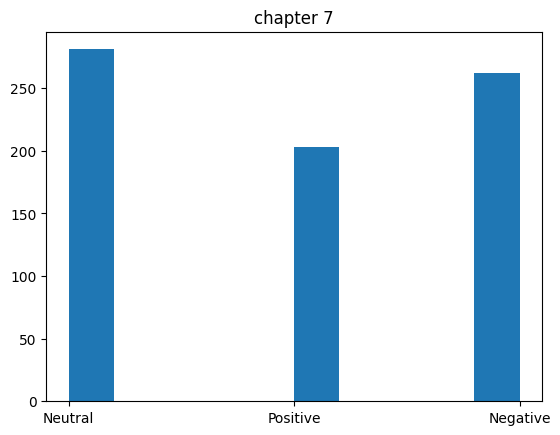

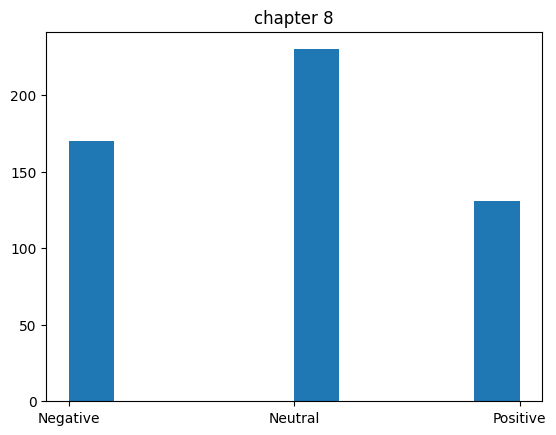

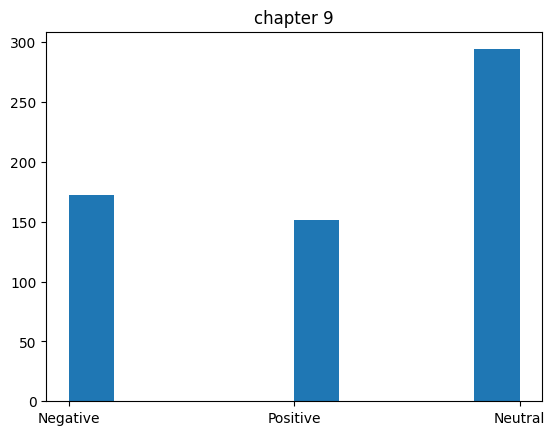

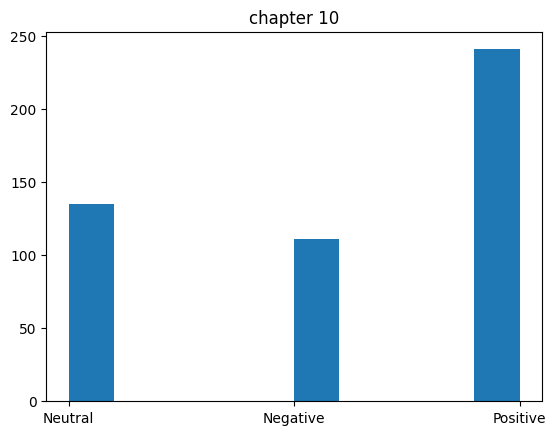

In [157]:
for chapter in analysis_score.keys():
    plt.hist(analysis_score[chapter])
    plt.title(chapter)
    plt.show()